<a href="https://colab.research.google.com/github/LiamgMachineLearning/MachineLearning/blob/master/MLAss1_Attempt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')


Mounted at /content/drive


In [0]:
from google.colab import files
uploaded = files.upload()

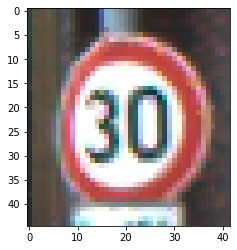

(45, 42, 3)

In [0]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("00001.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()
img.shape

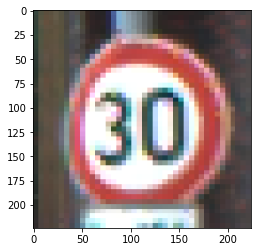

(224, 224, 3)

In [0]:
dim = (224,224)
image = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
img_cvt=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_cvt.shape
plt.imshow(img_cvt)
plt.show()
img_cvt.shape

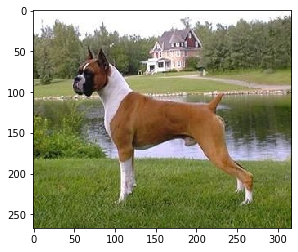

(267, 317, 3)

In [0]:
img1 = cv2.imread('box.jpg')
img1_cvt=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1_cvt)
plt.show()
img1.shape

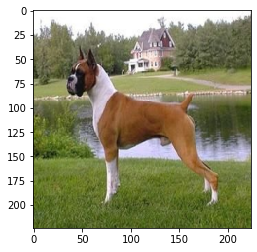

(224, 224, 3)

In [0]:
dim = (224,224)
image = cv2.resize(img1,dim, interpolation = cv2.INTER_AREA)
img1_cvt=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img1_cvt.shape
plt.imshow(img1_cvt)
plt.show()
img1_cvt.shape

In [0]:

from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['dog.jpg']))
View the image in google colab notebook using following command:

import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()
print()

SyntaxError: ignored

In [0]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
from google.colab import files
from io import BytesIO
from PIL import Image


#image = Image.open(BytesIO(uploaded['dog.jpg']))
#image = load_img('/Users/Liam/dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(img_cvt)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

cash_machine (16.83%)


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/' 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:


img_width, img_height = 256, 256
train_data_dir = "data/train"
validation_data_dir = "data/val"
nb_train_samples = 4125
nb_validation_samples = 466 
batch_size = 16
epochs = 50
